In [1]:
import sys
sys.path.insert(0, "../")
sys.path.insert(0, "../dataset_generator/")

import numpy as np
import matplotlib.pyplot as plt
#import analysis_tools2 as analysis_tools

import environments

#plt.style.use("./project_style.mplstyle")
import matplotlib

pane_size = plt.rcParams["figure.figsize"][0]

In [2]:
train_dataset = np.load("../datasets/points/train_dataset.npz")  # load dataset
val_dataset = np.load("../datasets/points/val_dataset.npz")

### Metadata

In [3]:
for name, dataset in zip(("Train", "Val"), (train_dataset, val_dataset)):
    print(f"{name} dataset:")
    print(f"{'Entry:':8} {'Shape:':15} {'dtype:':10}")
    for var in dataset:
        print(f"{var:8} {str(dataset[var].shape):15} {dataset[var].dtype}")

Train dataset:
Entry:   Shape:          dtype:    
r        (12000, 500, 2) float32
c        (12000, 500, 6) float32
Val dataset:
Entry:   Shape:          dtype:    
r        (3000, 500, 2)  float32
c        (3000, 500, 6)  float32


### Plot Random Example Trajectories

NameError: name 'analysis_tools' is not defined

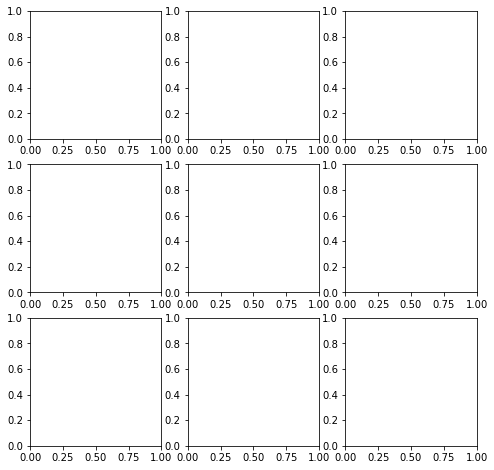

In [4]:
def plot_collage(environments):
        
    collage = ["square", "circle", "walled_square", 
               "circle", "large_square", "circle",
               "walled_square", "rectangle", "square_toroid"]
    
    rows = 3
    cols = 3
    fig, axs = plt.subplots(rows,cols, figsize = (pane_size*1.25, pane_size*1.25))
    _, r, _, c = analysis_tools.test_dataset(collage, 500, context = True) # create dataset
    for i in range(len(collage)):
        row = i // rows
        col = i % cols
        axs[row,col].plot(r[i,:,0], r[i,:,1], linewidth = 0.5)
        lim = np.amax(np.abs(r))*1.1
        axs[row,col].axis([-lim, lim, -lim, lim])
        axs[row,col].axis("off")

        for wall in environments.envs[collage[i]]*1.05:
            axs[row,col].plot(wall[:,0], wall[:,1], "k")
            
env = environments.Environments()
plot_collage(env)
plt.subplots_adjust(wspace=-0.1, hspace=-0.05) 
plt.savefig(f"figures/environment_collage")            


### Inspect speed distributions 

In [5]:
r_train = train_dataset["r"][:]
v_train = train_dataset["v"][:]
c_train = train_dataset["c"][:]
s_train = np.linalg.norm(v_train, axis = -1)

labels = ["Square", "Circle", "Large Square", "Rectangle", "Walled Square", "Square Toroid"]

# env id is index of first non-zero element
env_id = np.argmax(c_train[:,0], axis = -1)

fig, ax =  plt.subplots(1, figsize = (pane_size, pane_size))
ax.hist(s_train.ravel(), bins = 40, density = True, alpha = 0.75)
ax.axis([0, 2, 0, 1.5])
ax.set_xlabel("Speed")
ax.set_ylabel("Density")
plt.subplots_adjust(wspace =0, hspace = 0)
plt.tight_layout()
#plt.savefig("figures/speed_distribution")

KeyError: 'v is not a file in the archive'

### And distribution of head directions

In [6]:
hd_train = np.arctan2(v_train[...,1], v_train[...,0])

# hist expects left edge of first bin, right egde of last
theta = np.linspace(-np.pi, np.pi, 100) 
fig = plt.figure(figsize = (3/2*pane_size, pane_size))
eval_theta = theta[:-1] + (theta[1]-theta[0])/2 # evaluate at bin centers

for i in range(c_train.shape[-1]):
    mask = env_id == i
    
    ax = plt.subplot(2, 3, i+1, polar = True)
    ax.set_title(labels[i])
    
    hist, _ = np.histogram(hd_train[mask].ravel(), bins = theta, density = True)
    ax.plot(eval_theta, hist, "-", alpha = 0.75,linewidth = 2)
    ax.set_yticks([0.05, 0.25])
    ax.set_xticklabels([])
    
plt.subplots_adjust(wspace=0.5, hspace=0.3)
#plt.savefig("figures/hd_distributions.svg")

NameError: name 'v_train' is not defined

### Lastly, we inspect the visitation distributions

In [7]:
fig =  plt.figure(figsize = (3/2*pane_size, pane_size))

env_id = np.argmax(c_train[:,0], axis = -1) # env id is index of first non-zero element

bins = np.linspace(-1.5, 1.5, 100)*1.1

for i in range(c_train.shape[-1]):
    mask = list(env_id == i)
    ax = fig.add_subplot(2, 3, i+1)
    u = r_train[mask]
    hist = np.histogram2d(r_train[mask][...,0].ravel(), r_train[mask][...,1].ravel(), bins)[0]
    hist[hist == 0] = np.nan

    if i == 0:
        vmax = np.nanmax(hist) # calibrate wrt. small quare

    im = ax.imshow(hist.T, origin = "upper", vmin = 0, vmax = vmax)

    ax.set_title(labels[i])
    ax.axis("off")
    
plt.subplots_adjust(wspace=0.5, hspace=0.05) 
#plt.savefig("figures/visitation_density")

NameError: name 'c_train' is not defined

<Figure size 691.2x460.8 with 0 Axes>

NameError: name 'im' is not defined

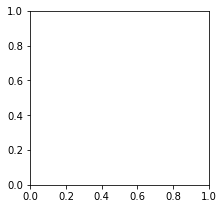

In [8]:
cbar_fig = plt.figure(figsize = (pane_size*0.5, pane_size*0.5))
ax = plt.subplot(111)

cbar = fig.colorbar(im, ax = ax, shrink = 1, location = "bottom", ticks = [0, 0.2, 0.4])
ax.axis("off")
#plt.savefig("figures/visitation_density_cbar")